<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-con-R/blob/main/michaelis-menten-y-hill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: La ecuación de Michaelis-Menten y la ecuación de Hill

Autor: Biología de sistemas UNAM

Fecha: febrero 2021

mostrar ecuación de Hill /michaelis menten en collab / papel y lápiz: Ecuaciones de Michaelis – Menten, ecuación de Hill, ultrasensibilidad, para diferentes coeficientes de Hill; Ejemplo de cómo se obtienen de manera simbólica los puntos de equilibrio de un sistema de EDos, usando Python

# Ecuación de Michaelis-Menten 

## 1. Describir el proceso 

Se lleva a cabo la transformación de un sustrato, $S$, a un producto, $P$. Esta reacción se realiza mediante la acción de una enzima, $E$, formando el complejo enzima sustrato, $ES$, como intermediario. El siguiente conjunto de reacciones describen este proceso

Reacción de formarción del complejo
$$
E + S \xrightarrow[]{k_1} ES \tag{1}
$$

Dado que la reacción anterior es reversible se tiene
$$
ES \xrightarrow[]{k_{-1}} E + S \tag{2}
$$

Para la formación del producto se considera la reacción no reversible

$$
ES \xrightarrow[]{k_2} P \tag{3}
$$

En el análisis posterior se realizan las siguientes suposiciones:

1. La cantidad total de enzima en el proceso permanece constante 

$$
E_{tot} = E + ES \tag{4}
$$

2. Se asume que el cambio en la concentración del complejo enzima-sustrato durante el proceso es despreciable. Es decir 

$$
\frac{dES}{dt} = 0 \tag{5}
$$

## 2. Red para describir el proceso 


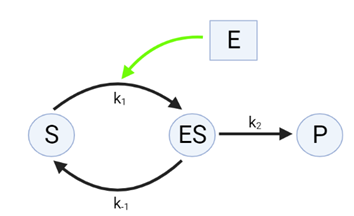

Figura 1. Red para describir el conjunto de reacciones (1)-(3). Se aprecia el efecto positivo de la enzima sobre la formación del complejo ES.

## 3. Establecer modelo 

Balance para el sustrato

$$
\frac{dS}{dt} = -k_1E\times S + k_{-1}ES \tag{7}
$$

$$
\
$$

Balance para el complejo enzima-sustrato

$$
\frac{dES}{dt} = k_1E\times S - k_{-1}ES - k_2ES \tag{8}
$$

$$
\
$$

Balance para el producto

$$
\frac{dP}{dt} = k_2ES \tag{9}
$$

Aplicando la ecuación de conservación (4) y la ecuación (5) se tiene 

$$
\frac{dES}{dt} = k_1(E_{tot} - ES)\times S - k_{-1}ES - k_2ES  = 0
$$

$$
\
$$

$$
(k_1S + k_{-1} + k_2)ES = k_1 E_{tot}
$$

$$
\
$$

$$
ES = \frac{k_1E_{tot}}{k_{-1} + k_2 + k_1S} \tag{10}
$$

$$
\
$$

Sustituyendo (10) en (9) se tiene 

$$
\frac{dP}{dt} = k_2\left( \frac{k_1E_{tot}}{k_{-1} + k_2 + k_1S} \right)
$$

Haciendo 

$$
K_M = \frac{k_{-1} + k_2}{k_1}, \hspace{1cm} v_{max} = k_2E_{tot}
$$

Se llega a 

$$
\frac{dP}{dt} = v_{max}\left( \frac{S}{K_M + S} \right)  \tag{11}
$$

La ecuación (11) se conoce como la ecuación de Michaelis-Menten y describe la velocidad de generación de producto como función de la concentración de sustrato. 





Tabla 1. Valor de parámetros de diferentes enzimas

| enzima |$K_M$ (M)| $k_2$ (1/s) |$k_2/K_M$ (1/(M s))$|
|:---:|:---:|:---:|:---:|
| pepsina | 3.0 E-4 | 0.5 | 1.7 E3 |
| T-ARN sintetasa | 9.0 E-4 | 7.6 | 8.4E3 |
| ribonucleasa | 7.9 E-3 | 7.6 E2 | 1.0 E5 |
| caboxilasa | 2.6 E-2 | 4.0 E5 | 1.5 E7 |
| fumarasa | 5.0 E-6 | 8.0 E12 | 1.6 E8 |

In [1]:
# velocidad de formación de producto 
velocity <- function(S, p) {
    with(as.list(p), {
        # velocidad de formación de P
        v = vmax*S/(Km + s)

        return(v)
    })
}

In [18]:
# simular con valores de la pepsina 
k2 <- 0.5 # 1/s
Etot <- 0.001 # M
p <- c(Km = 3.0*10^(-4), vmax = k2*Etot)
# valores de sustrato 
s <- seq(0,0.003,0.0001)
vel <- velocity(s, p)

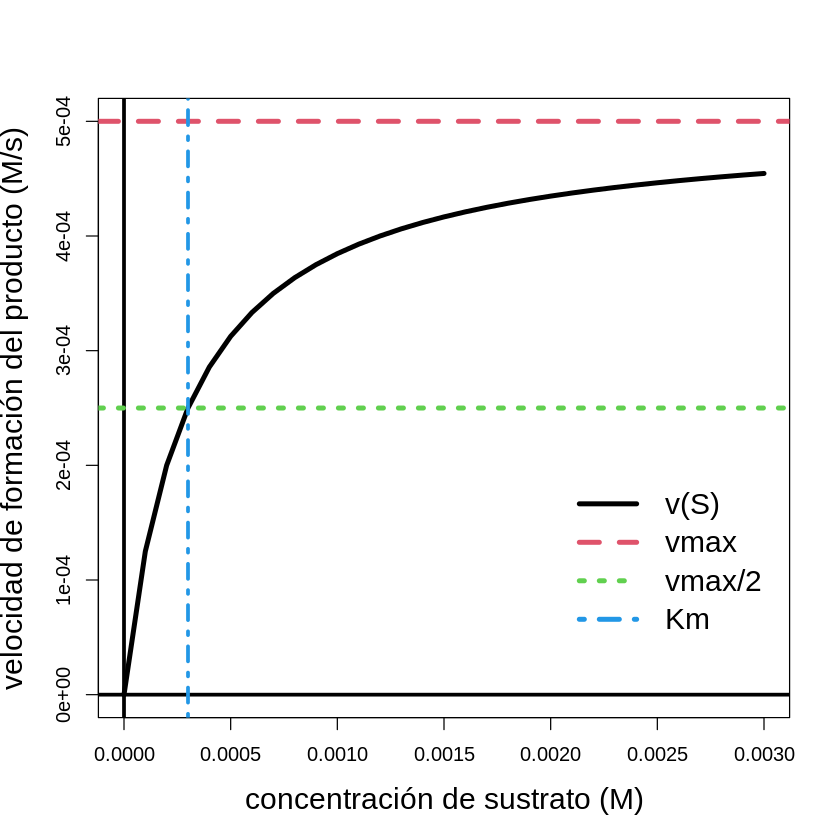

In [23]:
# mostra resultados 
plot(s, vel, type = "l", xlab = "concentración de sustrato (M)", ylab = "velocidad de formación del producto (M/s)",
     cex.lab = 1.5, lwd = 4, ylim = c(0,p["vmax"]))
abline(h = 0, v = 0, col = rep(1,2), lwd = 3)
abline(h = p["vmax"], lwd = 4, lty = 2, col = 2)
abline(h = p["vmax"]/2, lwd = 4, lty = 3, col = 3)
abline(v = p["Km"], lwd = 3, lty = 4, col = 4)
legend(x = 0.0020, y = 2e-4, legend = c("v(S)", "vmax","vmax/2", "Km"), lty = 1:4, col = 1:4, bty = "n", lwd = 4, cex = 1.5)

Figura 2. Gráfica de la velocidad de formación de producto como función de la concentración de sustrato. Se observan los distintos parámetros de la ecuación (11). Es posible apreciar que a valores muy bajos de concentración la velocidad de formación de producto aumenta linealmente con la concentración de sustrato, mientras que a valores muy altos la velocidad permanece casi contante, acercandose a la velocidad máxima. 


Aplicando la ecuación (4) y la ecuación (10) en (7) se llega a 

$$
\
$$

$$
\frac{dS}{dt} = -k_1E_{tot}S + (k_1S + k_{-1})\left( \frac{E_{tot}S}{K_M + S} \right) \tag{12}
$$

Las ecuaciones (11) y (12) describen el proceso

Tabla 2. Valor de parámetros del modelo de Michaelis-Menten usados para el análisis dinámico 

|parámetro | valor |
|:---:|:---:|
| $k_1$ (1/(M s)) | 0.5 |
| $k_{-1}$ (1/s)| 0.1 |
| $k_2$ (1/s)| 0.2 |
| $K_M$ (M)| 0.6 |
| $E_{tot}$ (M) | 10 |

## 4. Análisis de estabilidad

En este caso se puede observa de las ecuaciones (11) y (12) que el equilibrio se presenta cuando la concentración de sustrato, S, es cero. 

## 5. Análisis dinámico (integración numérica)



In [4]:
install.packages("deSolve")
library(deSolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
# establecer modelo 
mich_ment <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        Km = (ki + k2)/k1
        vmax = k2*Etot

        # balance para S
        dSdt = -k1*Etot*S + (k1*S + ki)*Etot*S/(Km + S)

        # balance para P 
        dPdt = vmax*S/(Km + S)

        return(list(c(dSdt,dPdt)))
    })
}

In [47]:
# establecer parámetros 
p <- c(k1 = 0.05, ki = 0.04, k2 = 0.5, Etot = 0.1)
# condiciones iniciales 
s <- c(S = 1, P = 0)
# tiempo de integración
time <- seq(0,1000,1)

In [48]:
out <- ode(func = mich_ment, y = s, times = time, parms = p, method = "rk4")
out <- as.data.frame(out)
head(out)

,time,S,P
,<dbl>,<dbl>,<dbl>
1,0,1.0000000,0.000000000
2,1,0.9957709,0.004229080
3,2,0.9915582,0.008441779
4,3,0.9873619,0.012638149
5,4,0.9831818,0.016818241
6,5,0.9790179,0.020982108


In [49]:
# cargar ggplot2
library(ggplot2)

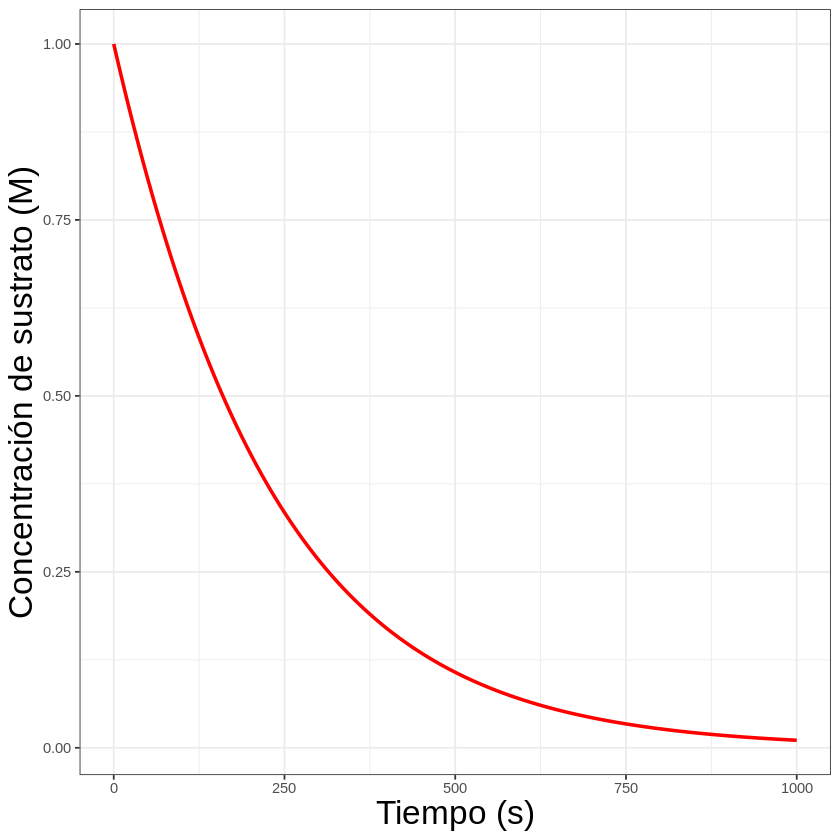

In [50]:
ggplot(out, aes(x = time)) +
geom_line(aes(y = S),color = "red", lwd = 1) + 
xlab("Tiempo (s)") +
ylab("Concentración de sustrato (M)") +
theme_bw() +
theme( 
        axis.title = element_text(size = 20)
)

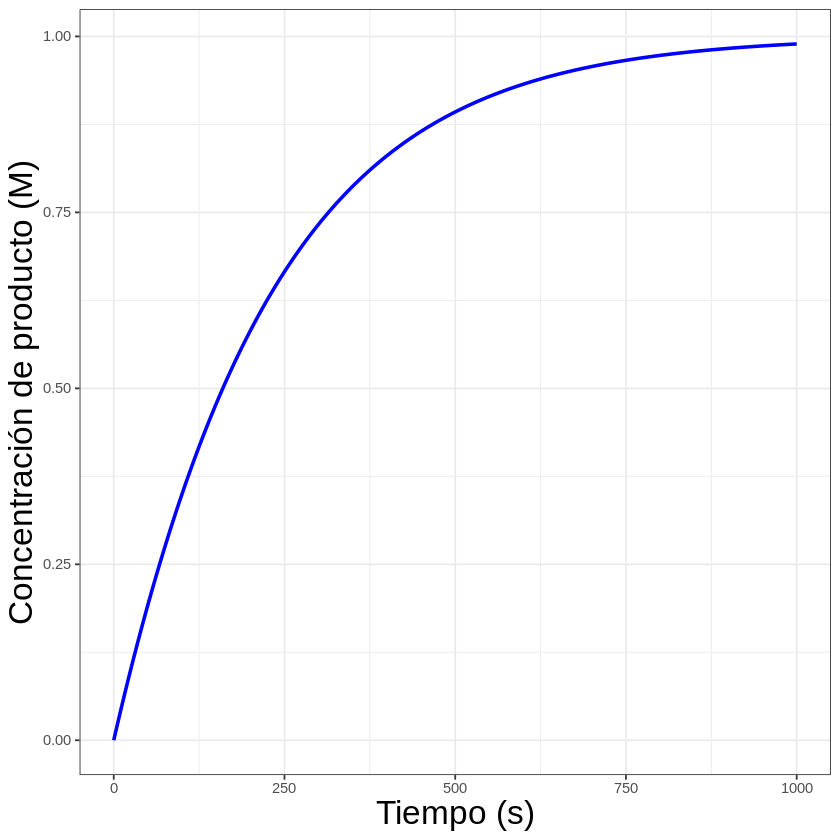

In [51]:
ggplot(out, aes(x = time)) +
geom_line(aes(y = P),color = "blue", lwd = 1) + 
xlab("Tiempo (s)") +
ylab("Concentración de producto (M)") +
theme_bw() +
theme( 
        axis.title = element_text(size = 20)
)

# Ecuación de Hill

## 1. Descripción del proceso 

Considere una proteína como la hemoglobina o un receptor de proteína, con sitios de unión para ligandos. La unión de los ligandos a la proteína se puede representar mediante la expresión de equilibrio químico:

$$
P + nL \xrightarrow[]{k_1} PL_n \tag{13}
$$

$$
PnL \xrightarrow[]{k_{-1}} P + nL \tag{14}
$$

Donde $k_1$ (velocidad de avance, o la velocidad de asociación del complejo de ligando de proteína) y $k_{-1}$ (velocidad de retroceso, o la velocidad de disociación del complejo) son las constantes de velocidad de reacción para la asociación de los ligandos a la proteína y su disociación de la proteína, respectivamente. 

## 2. Red para describir el proceso 

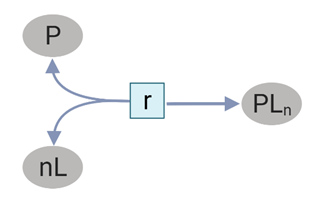

Figura 3. Red del proceso para describir las reacciones (13)-(14). 

## 3. Establecer el modelo 

Balance para la proteína 

$$
\frac{dP}{dt} = -k_1PL^n + k_{-1}PL_n \tag{15}
$$

Balance para el ligando 

$$
\frac{dL}{dt} = -nk_1PL^n + nk_{-1}PL_n \tag{16}
$$

Balance para el comlejo proteína-ligando 

$$
\frac{dPL_n}{dt} = - k_{-1}PL_n + k_1PL^n \tag{17}
$$

## 4 . Anállisis de establilidad 

En este caso únicamente se  tiene una ecuación, ya que (15), (16) y (17) son equivalentes. Esto es así porque las tres especies que se analizan participan en la misma reacción. En el equilibrio se tiene

$$
k_1PL^n - k_{-1}PL_n = 0 \tag{18}\\
$$

Si consideramos que la concentración total proteína es 

$$
P_{tot} = P + PL_n \tag{19}\\
$$

Sustituyendo (19) en (18)  y haciendo $K_D = k_{-1}/k_1$ se tiene

$$
\frac{PL_n}{P_{tot}} = \theta = \frac{L^n}{K_D + L_n} \tag{20}\\
$$

Donde $\theta$ es la fracción de proteína unida al ligando, $K_D$ es la constante de equilibrio y $n$ es el coefficiente de Hill. El coefficiente de Hill permite conocer el efecto de cooperatividad entre los ligandos cuando se unen a la proteína. Un valor de $n$ mayor a uno indica que hay cooperatividad positiva, un valor menor a uno indica que hay cooperatividad negativa, mientras que un valor de uno implica que la unión de los ligandos a la proteía no influye en la afinidad de la proteía hacia los demás ligandos. 

La ecuación (20) se conoce como la ecuación de Hill. Se utiliza en farmacología para cuentificar los parámetros funcionales de un fármaco, para describir relaciones dosis-respuesta. Además ha sido ampliamente usada para describir la regulación de genes a través de factores de transcripción. 

In [52]:
hill <- function(L, p) {
    with(as.list(p), {

        # fracción de proteína unida al ligando  
        theta = L^n/(Kd + L^n)

        return(theta)
    })
}

In [54]:
# parámetros
p <- c(Kd = 1, n = 1)
# valores de L a evaluar 
L <- seq(0,10,0.1)
# evaluar función
theta <- hill(L,p)

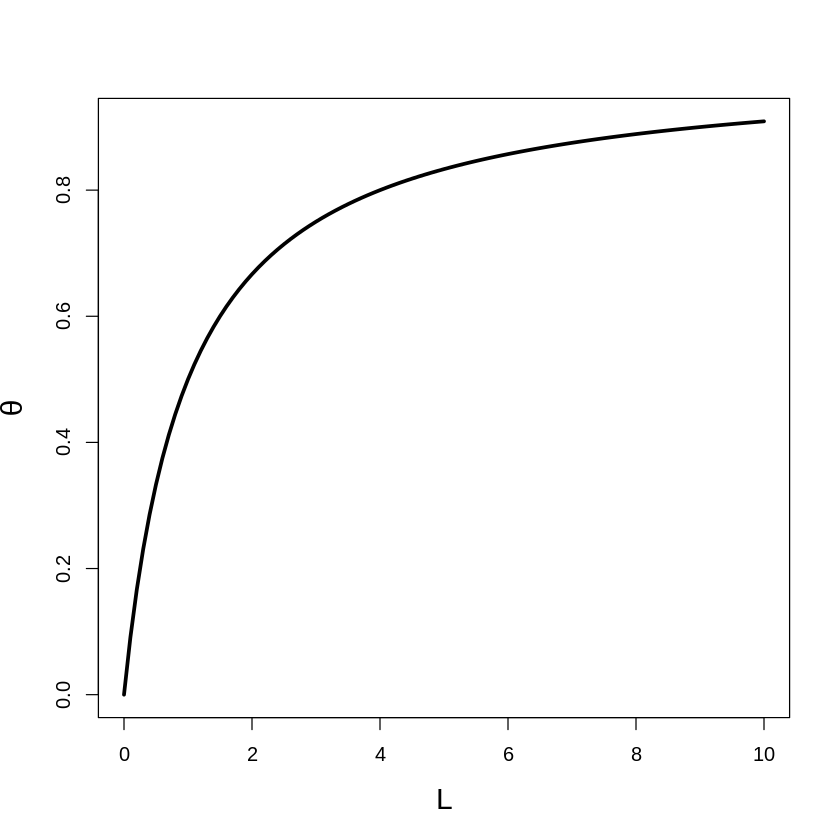

In [60]:
plot(L, theta, type = "l", xlab = "L", ylab = expr(theta), cex.lab = 1.5, lwd = 3)